#    "Raíces en Tierras Lejanas"


En un pequeño pueblo en la provincia de Granma, dos amigos de la infancia, Juan y Mireya, crecieron entre los extensos campos de boniato y los frondosos árboles de mango. A medida que crecían, surgieron en ellos sueños de explorar nuevas oportunidades en un lugar diferente, un destino que vieron en la bulliciosa capital de Cuba, La Habana.
Impulsados por su ambición y sed de descubrimiento, Juan y Mireya decidieron emprender el viaje en busca de un futuro diferente; dejaron atrás los cultivos familiares, las risas compartidas en la sombra de los árboles de mango y los atardeceres sobre los campos de caña. Después de un largo viaje, finalmente llegaron a La Habana. Allí, se encontraron con un mundo completamente nuevo y emocionante, lleno de oportunidades y posibilidades. 

En esta breve hisotria se ve evidenciado la emigración, o desplazamiento de personas con el fin de establecerse de manera semipermanente o definitiva en otro lugar, motivado por diversas razones, ya sea como las de Juan y Mireya, en busqueda de nuevas oportunidades, o por situaciones sociales, políticos o incluso ideológicas.





 

In [686]:
#importar las bibliotecas
import plotly.express as px
import json 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pygwalker as pyg

#cargamos los datos de json
with open ('datos.json','r')as gr:
    dt = gr.read()
granma = json.loads(dt)

##### función que utilizo #####

#función para llenar listas con los datos del Json 
def llenar_lista(filtro1:str, filtro2:str,lista1:list)->list:
    lista = []
    for keys,values in granma.items(): #itero el diccionario
        if keys == filtro1: #si la clave del diccionario inicial es igual al primer filtro
            for clave,valor in values.items(): # itero el segundo diccionario2
                if clave in lista1: # si las claves están en la lista1 enviada por parametro
                     for key,value in valor.items():# itero el diccionario3 del valor de las claves que esten en la lista1
                            if key == filtro2: # si la clave de diccionario3 es igual al ultimo filtro2
                                lista.extend(value) #agrego a la lista las lista de listas
              
    return lista



#### ¿Cuántas personas han tomado decisiones similares o iguales a la de Juan y Mireya?

Muchas personas a lo largo de los años han emigrado hacias otras provincias, antes de la división político administrativa (DPA) del 2011 existia Ciudad de la Habana, la cual era la capital y alcanzó las mayores cantidades de migrantes en los años 2008 y 2010 con 1684,1839 respectivamente. Después de la DPA se incorporan las provincias Artemisa y Mayabeque y deja de exisitr Ciudad de la Habana. La Habana, al pasar a ser la Capital del pais pasa a ser rápidamente el objetivo de la mayor cantidad de personas, por lo que no es de extrañar que fuera la provincia lider en cifras a partir de ese momento, en el 2016 con 2692 y en 2022 con un total de 3314 personas, La Habana alcanza sus picos más altos. Otras provincias donde se alcanza cifras interesantes son Matanzas, Mayabeque y Artemisa que se mantienen con un ritmo relativamente constante de emigrantes en los diferentes años.

Provincias como Guantánamo, Pinar del Rio y La Isla de la Juventud presentan un flujo de migrantes granmences muy bajo, dos de ellas ubicadas en la zona más oriental del país (Guantánamo), y la otra en la zona más occidental       (Pinar del Rio). Se concluye que la gran mayoria de los migrantes si deciden tomar decisiones similares a Juan y Mireya con destino hacia la capital o sus alrededores (Matanzas, Mayabeque y Artemisa).
##### ¿Porqué pasará esto?
 Es algo común qué el destino de los migrantes de un pais sea la capital, esta se cuenta con la mayor cantidad de recursos, muchas más oportunidades laborales tanto en la misma capital como en el exterior. Pero no todos tienen acceso a la capital o  no quieren perder el ambiente rural y deciden optar con ubicaciones a sus fornteras, así grantizan un viaje más corto hacia la capital donde pueden abastecerse de productos básicos de primera necesidad e incluso pueden garantizarse trabajo o educación, en esta ultima solo hay carreras universitarias que solo se estudian en la Habana, un claro ejemplo es la carrera Ciencia de Datos que solo está disponible en la región occidental. 

In [687]:
#llamamos a la función llenar_listas 
# con los dos primeros parametros son los filtros para llenar la lista con los datos del json
# el tercer parametro es una lista de todas las Provincias
provi = llenar_lista("ProvinciasMI","emigracion06-22",granma['Provincias'])

#separar datos de hombres que estan en los indices par
proviH = [y for x,y in enumerate(provi) if x%2 == 0 ]

#lo llevamos a matriz de numpy
proviH = np.array(proviH)

#separar datos de mujeres que están en indice impar
proviM = [y for x,y in enumerate(provi)if x%2 != 0]

#lo llevamos a matriz de numpy
proviM = np.array(proviM)

#sumamos los hombres mas las mujeres
sumaH_M = proviM + proviH

#creamos el dataFrame de Hombres y mujeres de la emigración interna desde el 2006-2022
#se le asigna a los indices las provincias y a las columnas los años del 2006-2022
df = pd.DataFrame(sumaH_M,index = granma["Provincias"],columns = [x for x in granma["años"]if x >= 2006])

#le hacemos la transpuesta
df = df.T

#creamos un gráfico de lineas con plotly
fig = px.line(df,x = df.index,y = df.columns,template = 'seaborn')
#cambiamos el nombre de los ejes de coordenadas
fig.update_yaxes(title_text = 'Cantidad de emigrantes')
fig.update_xaxes(title_text = 'Años')

Según las últimas estadísticas, se estima que alrededor del 50% de los emigrantes procedentes de esta provincia son mujeres. Este dato revela una tendencia significativa en la composición de la población migrante, donde las mujeres juegan un papel cada vez más relevante en la búsqueda de oportunidades fuera de sus fronteras.
La presencia equitativa de mujeres en el flujo migratorio de Granma refleja una realidad social en la que las mujeres están asumiendo un rol activo en la toma de decisiones sobre su futuro y su bienestar. Cada vez más mujeres están optando por emprender el desafío de vivir en una provincia diferente.

La media de emigrantes mujeres a lo largo de los años representa un: 51%
La media de emigrantes hombres a lo largo de los años representa un: 49%


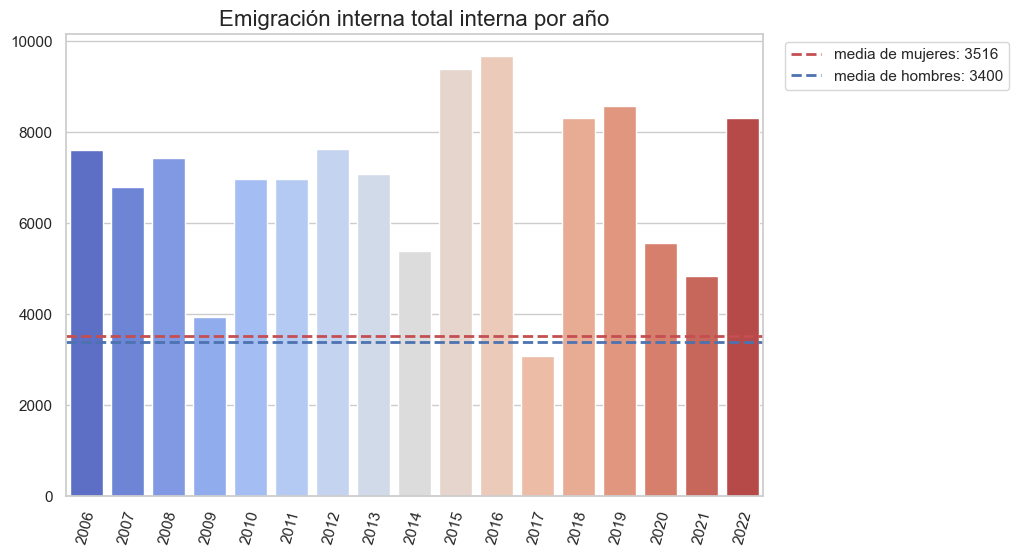

In [812]:
#transpuesta
sumaH_M = sumaH_M.T
#sumamos las filas 
total = sumaH_M.sum(axis = 1)
#transpuesta a la matriz de mujeres
proviMT = proviM.T
#sumar las filas de la matriz transpuesta de mujeres
totalM = proviMT.sum(axis = 1)
#restamos total-total de mujeres y obtenemos el total de los hombres en cada año
totalH = total-totalM
#calcuamos la media de hombres y mujeres
mediaH = round(np.mean(totalH))
mediaM = round(np.mean(totalM))
#media del porciento de mujeres y hombres y despues lo redondeo
porcientoM = round(((totalM/total)*100).mean())
porcientoH = round(((totalH/total)*100).mean())

print(f"La media de emigrantes mujeres a lo largo de los años representa un: {porcientoM}%")
print(f"La media de emigrantes hombres a lo largo de los años representa un: {porcientoH}%")
#ajustamos el tamaño de la gráfica 
plt.figure(figsize = (9, 6))
sns.barplot(x = [x for x in granma['años']if x >= 2006],y = totalMigrantes, palette = "coolwarm")
# Obtener los ejes actuales
ax = plt.gca()
#Configurar el ángulo de rotación en el eje x 
ax.set_xticklabels(ax.get_xticklabels(), rotation = 75)
#añadimos titulo
plt.title('Emigración interna total interna por año', fontsize = 16)
#agregamos las medias al gráfico
plt.axhline(y = mediaM, color = 'r', linestyle = '--', linewidth = 2,label = f"media de mujeres: {mediaM}")
plt.axhline(y = mediaH, color = 'b', linestyle = '--', linewidth = 2,label = f"media de hombres: {mediaH}")

#mostramos la leyenda
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')
#mostramos el gráfico 
plt.show()

#### ¿Serán cifras importantes?
Granma cuenta con una población promedio de 828521 residentes distribuidas entre 12 municipios, cada municipio dispone de una media de 63732 personas residentes, siendo Bayamo, capital de la provincia con media de 129251 residentes, casi el doble de la media de residentes por municipios. En cuanto a la representación de las mujeres en esta población, representan un 49%. Por lo que su mayoritaria presencia en los procesos migratorios internos no a representado una afectación a la población femenina de la provincia Granma, pues esta solo se ha visto disminuida en un 0.85% debido a estos, cifra que no considero significativa.

Es importante destacar que su presencia es significativa y diversa, son responsables de la reproducción y el cuidado de la siguiente generación, lo que garantiza la continuidad de la especie humana. Su capacidad para concebir y dar a luz a nuevos seres humanos es crucial para el crecimiento y la diversidad de la población. Además, desempeñan roles clave en la crianza y educación de los niños, transmitiendo valores, conocimientos y habilidades que son esenciales para el desarrollo de una sociedad sana y equilibrada. También contribuyen de manera significativa a la fuerza laboral y económica de una población, representan una parte importante de la fuerza laboral, desempeñando una amplia gama de roles en diversos sectores de la economía con un. Su participación activa en el mercado laboral contribuye al crecimiento económico y al desarrollo social, generando riqueza y oportunidades para la comunidad en su conjunto.

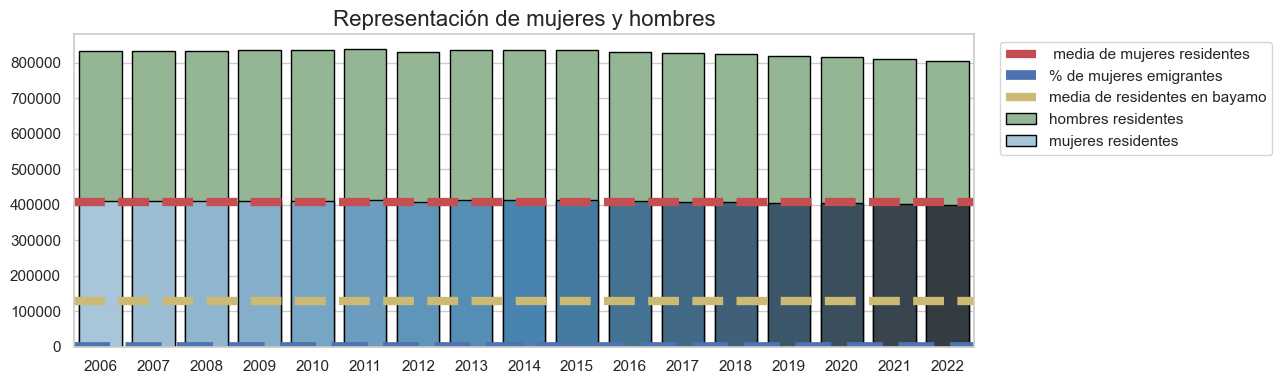

In [810]:
#lista de residentes hombres y mujeres 2006-2022
poblacionT = llenar_lista("municipios",'residentesH_M_06-22',granma['listamunis'])
#separo los hombres que están en los indice par
listaH = [y for x,y in enumerate(poblacionT) if x%2 == 0 ]

#separo las mujeres que están en los indice impar
listaM = [y for x,y in enumerate(poblacionT)if x%2 != 0]

#los llevamos a matrices numpy
listaH = np.array(listaH)
listaM = np.array(listaM)

#los sumamos
T = listaH + listaM

#transpuesta
T = T.T
listaMT = listaM.T

#media de la población 
mediaPobla = round(T.sum(axis = 1).mean())
#mediad de mujeres
mediaMuje = round(listaMT.sum(axis = 1).mean())
#media de bayamo
mediabay = round(np.sum(T[:,5].mean()))

#porciento de mujeres emigrantes con respecto al total de estas
p = (mediaM / mediaMuje) * 100
#media del total de municipios
mediaMun = round(T.mean())
#porciento de mujeres
porcientoM = round((mediaMuje / mediaPobla) * 100)
#sumas
TS = T.sum(axis = 1)
listaMTS = listaMT.sum(axis = 1)
#creamos dataframe de total de residentes
df = pd.DataFrame(T,index = [x for x in granma['años']if x >= 2006],columns = granma['listamunis'])
#dataframe del total de de mujeres por municipios 
dfMT = pd.DataFrame(listaMT,index = [x for x in granma['años']if x >= 2006],columns = granma['listamunis'])

#creación de subplots
axes = plt.subplots(ncols = 1, figsize = (10, 4))
sns.barplot(x = [x for x in granma['años']if x >= 2006],y = TS,ax = axes[1],color = 'darkseagreen',edgecolor = "black",label = "hombres residentes")
sns.barplot(x = [x for x in granma['años']if x >= 2006],y = listaMTS,ax = axes[1],palette = 'Blues_d',edgecolor = "black",label = 'mujeres residentes')
axes[1].set_title('Representación de mujeres y hombres',fontsize = 16)
plt.tight_layout()
#agragamos la media de mujeres con respecto al total
plt.axhline(y = mediaMuje, color ='r', linestyle = '--', linewidth = 6,label = " media de mujeres residentes")
#agregamos el % de mujeres emigrantes con respecto a la media de muejeres
plt.axhline(y = p, color = 'b', linestyle = '--', linewidth = 7,label = "% de mujeres emigrantes")
#agregamos la media de residentes de bayamo
plt.axhline(y = mediabay, color = 'y', linestyle = '--', linewidth = 6,label = "media de residentes en bayamo")
#mostramos la leyenda
plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')
plt.show()

#### ¿ La población disminuirá?

Durante el período comprendido entre los años 2008 y 2012, la población de una determinada región experimentó un notable aumento en su tasa de crecimiento. Este incremento en el número de habitantes puede haber sido resultado de diversos factores:
1. Natalidad: El número de nacimientos por cada 1,000 personas en una población, puede influir significativamente en la tasa de crecimiento. Un aumento en la tasa de natalidad puede llevar a un crecimiento poblacional más rápido, mientras que una disminución puede resultar en una tasa de crecimiento más lenta.

2. Mortalidad: La tasa de mortalidad, que se refiere al número de muertes por cada 1,000 personas en una población, también juega un papel importante en la tasa de crecimiento. Una alta tasa de mortalidad puede reducir el crecimiento poblacional, mientras que una baja tasa puede impulsar el crecimiento.

3. Migración: es un proceso de desplazamiento, ya sea a través de una frontera internacional o dentro de un mismo país, que comprende cualquier tipo de movimiento de las personas, independientemente de las causas..

4. Políticas gubernamentales: Las políticas relacionadas con la planificación familiar, la inmigración y la emigración, así como los programas de salud pública, pueden influir en la tasa de crecimiento de la población.

5. Factores socioeconómicos: La disponibilidad de empleo, acceso a servicios de salud, educación y vivienda, así como la estabilidad política y económica de un país, también pueden impactar en la tasa de crecimiento de la población.

En el año 2012, la población alcanzó su punto máximo en términos de tasa de crecimiento. Este hito marcó un momento crucial en la evolución demográfica de la región, ya que a partir de ese año, las tasas de crecimiento comenzaron a disminuir de manera gradual. Con la hipótesis de que en los próximos años siga disminuyendo. 

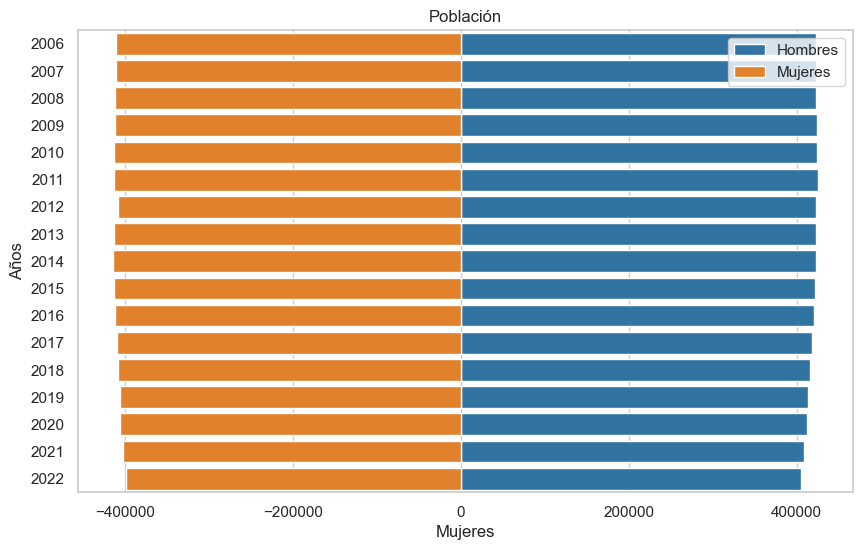

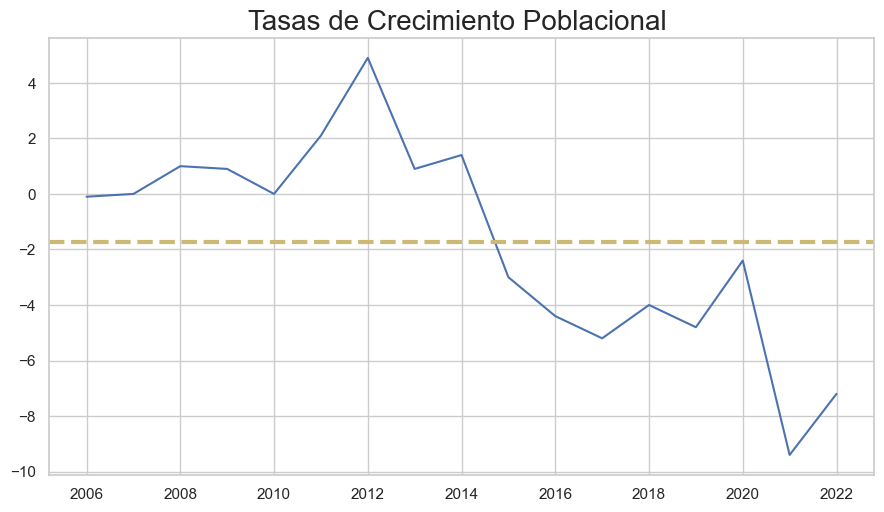

In [808]:
tc = granma['tasaCrecimiento']
tcm=np.array(tc.copy()).mean()
#listas de hombres y mujeres
m = listaM.T.sum(axis = 1)
h = listaH.T.sum(axis = 1)
# Crear el DataFrame 
data = {
    'Años': ['2006', '2007', '2008', '2009', '2010', '2011','2012','2013','2014',
                  '2015','2016','2017','2018','2019','2020','2021','2022'],
    'Hombres': h,
    'Mujeres': m
}
df = pd.DataFrame(data)
# Configurar el estilo y colores de la pirámide
sns.set(style="whitegrid")
colors = ["#1f77b4", "#ff7f0e"]  # Azul para hombres, naranja para mujeres
#tamaño de la pirámide 
plt.figure(figsize=(10, 6))
# graficar dos gráficos de barras horizontales, uno para hombres y otro para mujeres
bar1 = sns.barplot(x = 'Hombres', y = 'Años', data = df, color = colors[0], label = 'Hombres')
bar2 = sns.barplot( x= -df['Mujeres'], y = 'Años', data = df, color = colors[1], label = 'Mujeres')
# Ajustar la visualización de la pirámide
plt.ylabel("Años")
plt.title("Población")
plt.legend()
plt.show()
#tamaño del gráfico de lineas
fig = plt.subplots(figsize=(9,5))
plt.plot([x for x in granma['años']if x >= 2006],tc)
plt.tight_layout()
plt.axhline(y = tcm, color = 'y', linestyle = '--', linewidth = 3,label = "media")
plt.title("Tasas de Crecimiento Poblacional ",fontsize = 20)
plt.show()

#### ¿Será solo en Granma?¿Qué ocurre en las provincias cercanas? 

En Granma, la emigración ha estado influenciada por diversos factores, como las limitaciones económicas, las restricciones políticas y la búsqueda de mejores condiciones de vida. Muchos granmences han optado por emigrar en busca de oportunidades laborales, educativas o personales que no pueden encontrar en su lugar de origen. Esta tendencia se ha visto reflejada en otras provincias orientales de Cuba, donde la emigración también ha sido una realidad constante.
Una comparativa entre las tasas de emigración de Granma y la de otras provincias orientales de Cuba revela similitudes en las cifras con todas, Guantánamo con una media de -7.8 lidera las provincias orientales, seguido de Granma con -5.07 y en menor cantidad, Las Tunas con -2.85. Una tasa de emigración negativa significa que más personas deciden salir de la provincia, que las que deciden entrar. Esto indica que no solo es en Granma, en las provincias cercanas tambien se tiene un pensamiento similar de emigrar. En Granma particularmente, observando las medias de emigrantes por año (números no muy altos) y las tasas de emigración negativa, concluyo de que Granma ha experimentado una pérdida de pobblación, no en gran medida por los porcesos migratorios (de salidas), sinó que  acoge a menos emigrantes (de entrada). 





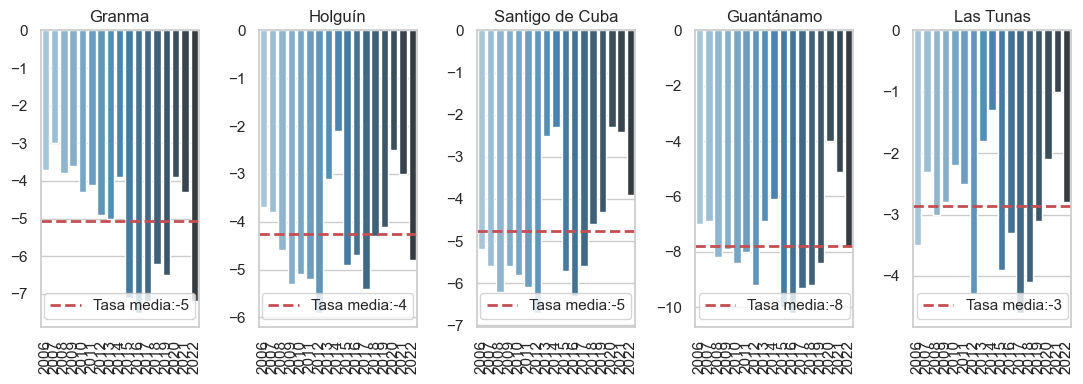

In [807]:
#listas de las tasas de emigración interna de las provincias orientales 
tmiGr = np.array(granma['TMI_general'])#Granma
tmiLT = np.array(granma['ProvinciasMI']["Las Tunas"]['tmi'])#Las Tunas
tmiH = np.array(granma['ProvinciasMI']['Holguín']['tmi'])#Holguín
tmiS = np.array(granma['ProvinciasMI']['Santiago de Cuba']['tmi'])#Santiago de Cuba
tmiG = np.array(granma['ProvinciasMI']['Guantánamo']['tmi'])#Guantánamo 

#promedios
proGs = tmiG.mean()
proH = tmiH.mean()
proLTs = tmiLT.mean()
proS = tmiS.mean()
proGR = tmiGr.mean()

# 5 subplots
fig,axes = plt.subplots(ncols = 5, figsize = (11,4))

sns.barplot(x = [x for x in granma['años']if x >= 2006],y = tmiGr,ax = axes[0],palette = 'Blues_d')
axes[0].set_title("Granma")
#Configurar el ángulo de rotación en el eje x 
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation = 90)

sns.barplot(x = [x for x in granma['años']if x >= 2006],y = tmiH,ax = axes[1],palette = 'Blues_d')
axes[1].set_title("Holguín")
#Configurar el ángulo de rotación en el eje x 
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)

sns.barplot(x = [x for x in granma['años']if x >= 2006],y = tmiS,ax=axes[2],palette = 'Blues_d')
axes[2].set_title("Santigo de Cuba")
#Configurar el ángulo de rotación en el eje x 
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation = 90)

sns.barplot(x = [x for x in granma['años']if x >= 2006],y = tmiG,ax = axes[3],palette = 'Blues_d')
axes[3].set_title("Guantánamo")
#Configurar el ángulo de rotación en el eje x 
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=90)

sns.barplot(x = [x for x in granma['años']if x >= 2006],y = tmiLT,ax = axes[4],palette = 'Blues_d')
axes[4].set_title("Las Tunas")
#Configurar el ángulo de rotación en el eje x 
axes[4].set_xticklabels(axes[4].get_xticklabels(), rotation = 90)

#agragar medias
axes[0].axhline(y = proGR, color = 'r', linestyle = '--', linewidth = 2,label = f"Tasa media:{round(proGR)}")
axes[1].axhline(y = proH, color = 'r', linestyle = '--', linewidth = 2,label = f"Tasa media:{round(proH)}")
axes[2].axhline(y = proS, color = 'r', linestyle = '--', linewidth = 2,label = f"Tasa media:{round(proS)}")
axes[3].axhline(y = proGs, color = 'r', linestyle = '--', linewidth = 2,label = f"Tasa media:{round(proGs)}")
axes[4].axhline(y = proLTs, color = 'r', linestyle = '--', linewidth = 2,label = f"Tasa media:{round(proLTs)}")

#ajustar tamaño entre las gráficas
plt.tight_layout()
#agregamos leyendas
for i in range(5):
    axes[i].legend( loc = 'lower center')
plt.show()

#### ¿?

In [691]:
#para visualizar la data
#recive un DataFrame
#pyg.walk(df, hideDataSourceConfig=True, theme_Key="vega", dark ="media")